<a href="https://colab.research.google.com/github/Baberbaba/Advanced-Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Setup
In this section, we will:
- Import necessary packages for executing the code
- Load the MNIST data package

In [ ]:
# !pip install --upgrade keras
# !pip install --upgrade tensorflow
# !pip install --upgrade scikit-learn

In [ ]:
# !pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building and training neural networks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings('ignore')


In [ ]:
# Load the 'mnist' package from 'keras'
from keras.datasets import mnist

# Part 2 - Data Preparation
In this section, we will:
- Load the MNIST data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays

In [ ]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print('Train data shape: ', X_train.shape) # (60000, 28, 28) --- 60000 images, each 28x28 pixels
print('Test data shape: ', X_test.shape) # (10000, 28, 28) --- 10000 images, each 28x28

Train data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [ ]:
# Look at the frequency of the unique class labels in the training data
unique, counts = np.unique(y_train, return_counts = True)
print('Train labels: ', dict(zip(unique, counts)))

# Look at the frequency of the unique class labels in the testing data
unique, counts = np.unique(y_test, return_counts = True)
print('Test labels: ', dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


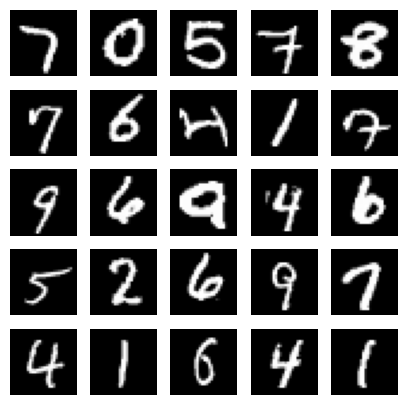

In [ ]:
# Sample 25 MNIST digits from the training data and view the images
indices = np.random.randint(0, X_train.shape[0], size = 25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize = (5, 5))

for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close('all')

In [ ]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

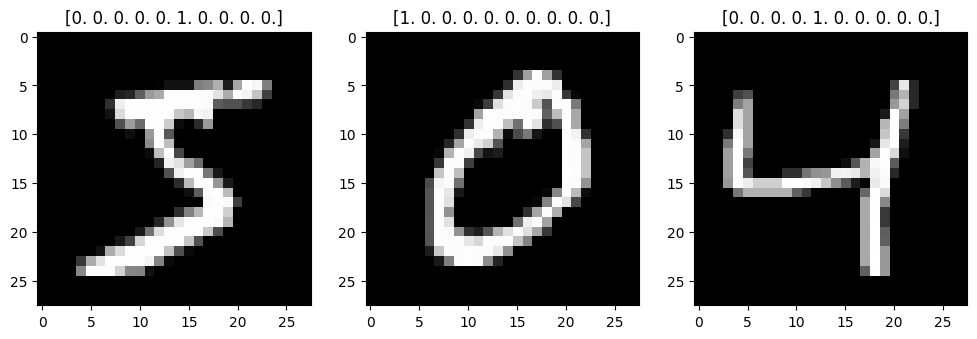

In [ ]:
# View the first few training data images and their corresponding labels
plt.figure(figsize = (12, 12))

for data_index in np.arange(0, 3, 1):
    plt.subplot(1, 3, data_index + 1)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

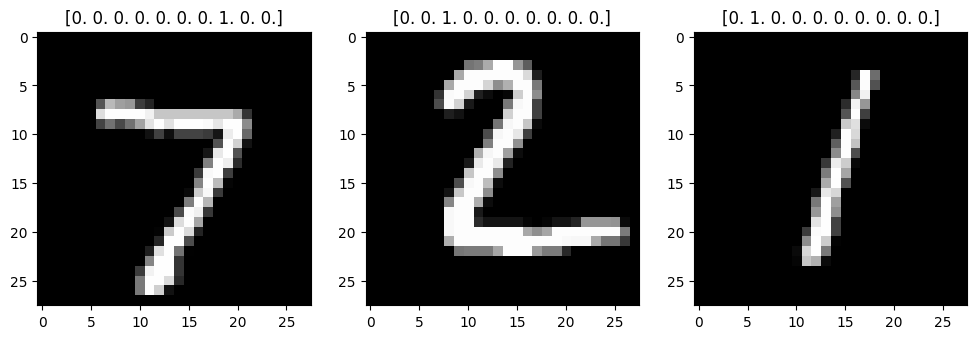

In [ ]:
# View the first few testing data images and their corresponding labels
plt.figure(figsize = (12, 12))

for data_index in np.arange(0, 3, 1):
    plt.subplot(1, 3, data_index + 1)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [ ]:
# Flatten the images by converting them into a list of values
image_vector_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# Part 3 - Basic Artificial Neural Network Model
In this section, we will:
- Define a function that creates an artificial neural network with specified default values for the following hyperparameters:
  - Number of hidden layers = 1
  - Number of neurons per hidden layer = 16
  - Activation function of all neurons excluding the output layer neurons = *sigmoid*
  - Loss function = *categorical crossentropy*
  - Learning rate = 0.001
- Use *softmax* activation function for the output layer neurons
- View the performance of the model on the training, validation and testing data sets

In [ ]:
# Define a function to create a neural network model and specify default values for hyperparameters
def create_nn(n_hidden = 1,
              n_neurons = 16,
              activation_function = 'sigmoid',
              loss_function = 'categorical_crossentropy',
              learning_rate_value = 0.001):

    nn = Sequential()

    nn.add(Dense(units = n_neurons,
                 input_shape = (image_vector_size, ),
                 activation = activation_function))

    for n_hid in np.arange(1, n_hidden, 1):
        nn.add(Dense(units = n_neurons,
                     activation = activation_function))

    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))

    nn.compile(loss = loss_function,
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = learning_rate_value))

    return(nn)

In [ ]:
# Fit the default neural network model to the training data for 200 epochs and save the training history
nn = create_nn()
nn.summary()
print('\n')
nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0980 - loss: 2.4332 - val_accuracy: 0.1125 - val_loss: 2.3495
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1136 - loss: 2.3490 - val_accuracy: 0.1331 - val_loss: 2.2992
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.1348 - loss: 2.2993 - val_accuracy: 0.1527 - val_loss: 2.2616
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.1531 - loss: 2.2623 - val_accuracy: 0.1669 - val_loss: 2.2309
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - accuracy: 0.1687 - loss: 2.2321 - val_accuracy: 0.1839 - val_loss: 2.2046
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.1854 - loss: 2.2060 - val_accuracy: 0.2080 - val_loss: 2.1811
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.2082 - loss: 2.1829 - val_accuracy: 0.2365 - val_loss: 2.1598
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.2382 - loss: 2.1619 - val_accuracy: 0.2708 - va

In [ ]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
1,0.098000,2.433181,0.112500,2.349534
2,0.113604,2.348958,0.133083,2.299158
3,0.134771,2.299349,0.152667,2.261605
4,0.153062,2.262329,0.166917,2.230928
5,0.168708,2.232070,0.183917,2.204554
...,...,...,...,...
196,0.833167,0.961836,0.848750,0.937155
197,0.833521,0.958812,0.849167,0.934103
198,0.833917,0.955804,0.849417,0.931067


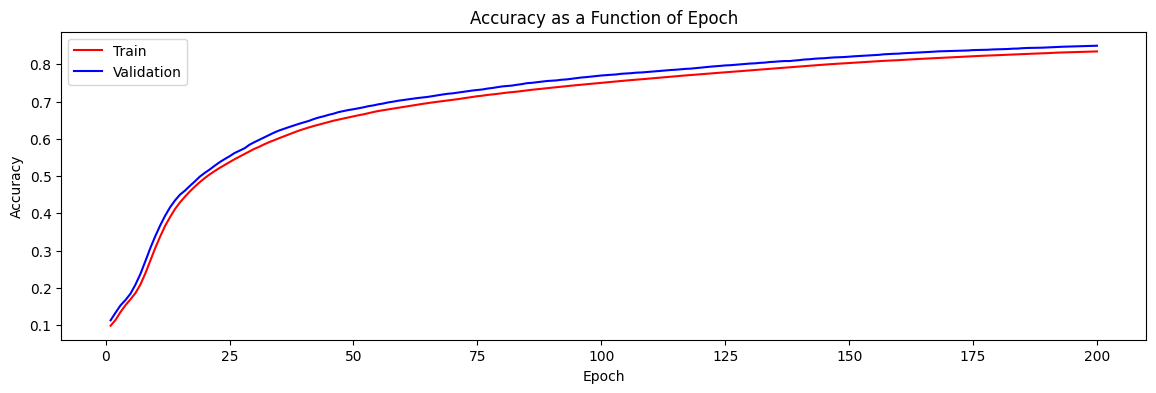

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 0.9807
The loss value of the model on the test data is 0.9319505095481873
The accuracy of the model on the test data is 0.8485000133514404


# Part 4 - Hyperparameter Tuning
In this section, we will:
- Tune the basic neural network model on the following hyperparameters:
  - Batch size
  - Activation function for the hidden layers
  - Loss function
  - Learning rate

## Subpart 1 - Tuning for Batch Size
Note: The number of epochs is set to 10 in this case. This is because parameters are updated multiple times in 1 epoch in mini-batch training. This greatly reduces the number of epochs required to optimally train the model.

In [ ]:
# Declare a range of batch sizes to tune for
batch_size_list = [16, 32, 64, 128]

# Create and train a neural network model for each value of batch size
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_batch_size in batch_size_list:
    indexcount = indexcount + 1

    nn = create_nn()

    print('\n Training and validation for batch size {} - START \n'.format(current_batch_size))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = current_batch_size, validation_split = 0.2, epochs = 10)
    print('\n Training and validation for batch size {} - END \n'.format(current_batch_size))

    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Batch Size': current_batch_size,
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for batch size 16 - START 



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7275 - loss: 1.1232 - val_accuracy: 0.9107 - val_loss: 0.3378
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9059 - loss: 0.3392 - val_accuracy: 0.9243 - val_loss: 0.2683
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9207 - loss: 0.2733 - val_accuracy: 0.9273 - val_loss: 0.2455
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9275 - loss: 0.2442 - val_accuracy: 0.9322 - val_loss: 0.2320
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9314 - loss: 0.2300 - val_accuracy: 0.9360 - val_loss: 0.2233
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9380 - loss: 0.2129 - val_accuracy: 0.9386 - val_loss: 0.2159
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9399 - loss: 0.2041 - val_accuracy: 0.9404 - val_loss: 0.2091
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9441 - loss: 0.1934

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7130 - loss: 1.2944 - val_accuracy: 0.9024 - val_loss: 0.4035
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9005 - loss: 0.3854 - val_accuracy: 0.9190 - val_loss: 0.2983
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9180 - loss: 0.3000 - val_accuracy: 0.9247 - val_loss: 0.2659
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2630 - val_accuracy: 0.9301 - val_loss: 0.2456
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9313 - loss: 0.2462 - val_accuracy: 0.9341 - val_loss: 0.2342
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9344 - loss: 0.2272 - val_accuracy: 0.9362 - val_loss: 0.2266
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9392 - loss: 0.2160 - val_accuracy: 0.9376 - val_loss: 0.2192
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9413 - loss: 0.2055 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6706 - loss: 1.4590 - val_accuracy: 0.8931 - val_loss: 0.5254
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.4863 - val_accuracy: 0.9095 - val_loss: 0.3474
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9061 - loss: 0.3536 - val_accuracy: 0.9185 - val_loss: 0.2945
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9178 - loss: 0.2979 - val_accuracy: 0.9253 - val_loss: 0.2661
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9229 - loss: 0.2720 - val_accuracy: 0.9307 - val_loss: 0.2483
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9293 - loss: 0.2525 - val_accuracy: 0.9350 - val_loss: 0.2335
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9306 - loss: 0.2464 - val_accuracy: 0.9373 - val_loss: 0.2250
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9355 - loss: 0.2323 - val_accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5936 - loss: 1.6561 - val_accuracy: 0.8616 - val_loss: 0.8124
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8592 - loss: 0.7290 - val_accuracy: 0.8957 - val_loss: 0.4798
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8935 - loss: 0.4646 - val_accuracy: 0.9101 - val_loss: 0.3680
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9050 - loss: 0.3694 - val_accuracy: 0.9172 - val_loss: 0.3171
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9139 - loss: 0.3241 - val_accuracy: 0.9243 - val_loss: 0.2866
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9214 - loss: 0.2917 - val_accuracy: 0.9278 - val_loss: 0.2667
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9266 - loss: 0.2691 - val_accuracy: 0.9310 - val_loss: 0.2530
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2553 - val_accuracy: 

Note that for smaller batch sizes, the time taken for training is longer. This is because computation of loss and consequently the execution of gradient descent happens for each batch. For a smaller batch size, there are more batches, and that leads to larger execution times.

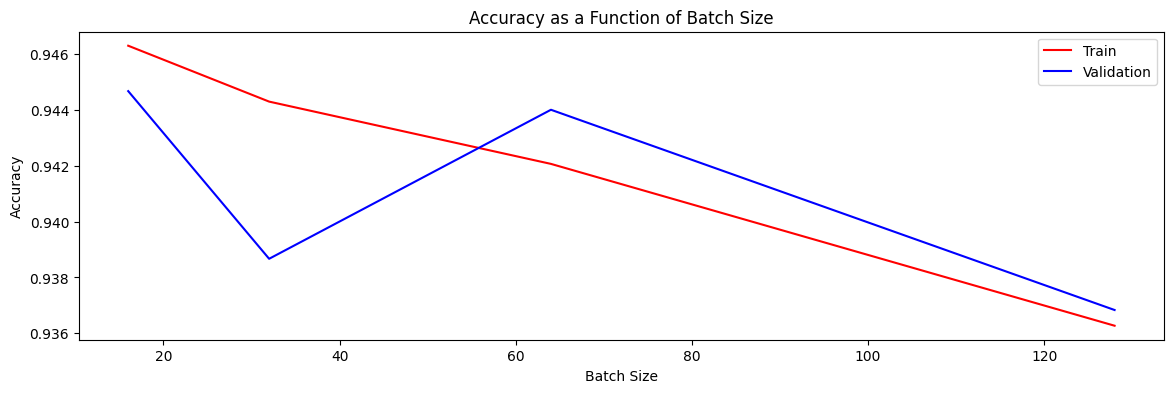

In [ ]:
# View the training and validation accuracies as functions of batch size
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Batch Size', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Batch Size', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Batch Size');

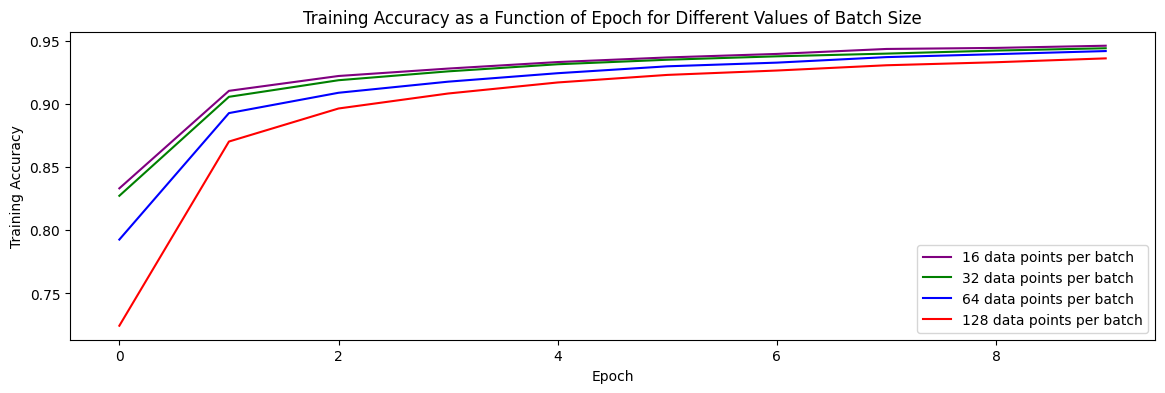

In [ ]:
# View the training accuracies as functions of epochs for different values of batch size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_batch_size in batch_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = str(current_batch_size) + ' data points per batch')

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Batch Size');

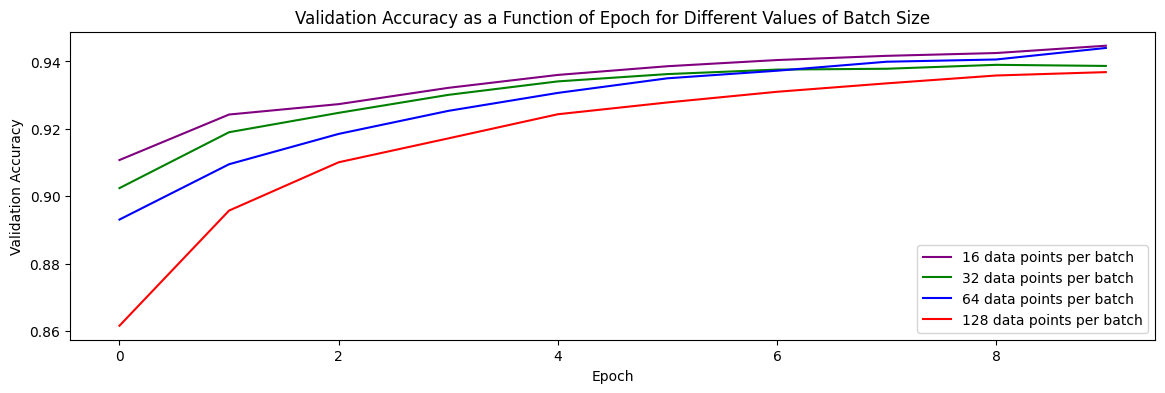

In [ ]:
# View the validation accuracies as functions of epochs for different values of batch size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_batch_size in batch_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = str(current_batch_size) + ' data points per batch')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Batch Size');

## Subpart 2 - Tuning for Activation Function

In [ ]:
# Declare a list of activation functions to tune for
activation_function_list = ['sigmoid', 'relu']

# Create and train a neural network model for each type of activation function
performance_df = pd.DataFrame(data = None)
indexcount = -1

for current_activation_function in activation_function_list:
    indexcount = indexcount + 1

    nn = create_nn(activation_function = current_activation_function)

    print('\n Training and validation for {} activation function - START \n'.format(current_activation_function))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} activation function - END \n'.format(current_activation_function))

    hist = pd.DataFrame(nn_history.history)

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Activation Function': current_activation_function,
                                  'Train Accuracy': hist['accuracy'][199],
                                  'Validation Accuracy': hist['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for sigmoid activation function - START 



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0934 - loss: 2.3653 - val_accuracy: 0.0868 - val_loss: 2.3096
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.0893 - loss: 2.3026 - val_accuracy: 0.1071 - val_loss: 2.2711
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1106 - loss: 2.2656 - val_accuracy: 0.1451 - val_loss: 2.2417
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - accuracy: 0.1478 - loss: 2.2374 - val_accuracy: 0.1892 - val_loss: 2.2171
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - accuracy: 0.1930 - loss: 2.2138 - val_accuracy: 0.2345 - val_loss: 2.1955
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - accuracy: 0.2359 - loss: 2.1930 - val_accuracy: 0.2716 - val_loss: 2.1759
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - accuracy: 0.2732 - loss: 2.1742 - val_accuracy: 0.3002 - val_loss: 2.1578
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.3033 - loss: 2.1568 - val_accuracy: 0.3257 - va

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0910 - loss: 2.3751 - val_accuracy: 0.1745 - val_loss: 2.2352
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.1674 - loss: 2.2421 - val_accuracy: 0.2419 - val_loss: 2.1542
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 0.2302 - loss: 2.1642 - val_accuracy: 0.2968 - val_loss: 2.0825
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.2858 - loss: 2.0953 - val_accuracy: 0.3451 - val_loss: 2.0169
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.3355 - loss: 2.0325 - val_accuracy: 0.3925 - val_loss: 1.9586
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.3773 - loss: 1.9760 - val_accuracy: 0.4385 - val_loss: 1.9050
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.4226 - loss: 1.9241 - val_accuracy: 0.4737 - val_loss: 1.8554
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.4542 - loss: 1.8752 - val_accuracy: 0.5147 - va

In [ ]:
# View the training and validation accuracies as functions of activation function type
performance_df.set_index('Activation Function')

,Train Accuracy,Validation Accuracy
Activation Function,,
sigmoid,0.841729,0.860667
relu,0.915625,0.916750


## Subpart 3 - Tuning for Loss Function

In [ ]:
# Declare a list of loss functions to tune for
loss_function_list = ['binary_crossentropy', 'categorical_crossentropy', 'mean_squared_error', 'mean_absolute_error']

# Create and train a neural network model for each type of loss function
performance_df = pd.DataFrame(data = None)
indexcount = -1

for current_loss_function in loss_function_list:
    indexcount = indexcount + 1

    nn = create_nn(loss_function = current_loss_function)

    print('\n Training and validation for {} loss function - START \n'.format(current_loss_function))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} loss function - END \n'.format(current_loss_function))

    hist = pd.DataFrame(nn_history.history)

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Loss Function': current_loss_function,
                                  'Train Accuracy': hist['accuracy'][199],
                                  'Validation Accuracy': hist['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for binary_crossentropy loss function - START 



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0909 - loss: 0.7044 - val_accuracy: 0.1020 - val_loss: 0.6581
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - accuracy: 0.1045 - loss: 0.6582 - val_accuracy: 0.1132 - val_loss: 0.6292
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - accuracy: 0.1156 - loss: 0.6292 - val_accuracy: 0.1183 - val_loss: 0.6080
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.1211 - loss: 0.6080 - val_accuracy: 0.1191 - val_loss: 0.5912
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.1220 - loss: 0.5912 - val_accuracy: 0.1187 - val_loss: 0.5774
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.1210 - loss: 0.5774 - val_accuracy: 0.1182 - val_loss: 0.5657
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.1195 - loss: 0.5657 - val_accuracy: 0.1163 - val_loss: 0.5555
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.1176 - loss: 0.5556 - val_accuracy: 0.1143 - va

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1163 - loss: 2.4286 - val_accuracy: 0.1291 - val_loss: 2.3645
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.1251 - loss: 2.3594 - val_accuracy: 0.1398 - val_loss: 2.3202
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - accuracy: 0.1366 - loss: 2.3165 - val_accuracy: 0.1528 - val_loss: 2.2867
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.1469 - loss: 2.2841 - val_accuracy: 0.1684 - val_loss: 2.2591
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - accuracy: 0.1639 - loss: 2.2574 - val_accuracy: 0.1963 - val_loss: 2.2354
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.1913 - loss: 2.2345 - val_accuracy: 0.2325 - val_loss: 2.2143
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - accuracy: 0.2279 - loss: 2.2140 - val_accuracy: 0.2709 - val_loss: 2.1951
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.2651 - loss: 2.1954 - val_accuracy: 0.3047 - va

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1273 - loss: 0.0907 - val_accuracy: 0.1275 - val_loss: 0.0905
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.1362 - loss: 0.0905 - val_accuracy: 0.1347 - val_loss: 0.0904
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.1445 - loss: 0.0903 - val_accuracy: 0.1450 - val_loss: 0.0902
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1523 - loss: 0.0902 - val_accuracy: 0.1530 - val_loss: 0.0900
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - accuracy: 0.1590 - loss: 0.0900 - val_accuracy: 0.1602 - val_loss: 0.0899
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1663 - loss: 0.0899 - val_accuracy: 0.1675 - val_loss: 0.0898
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.1729 - loss: 0.0898 - val_accuracy: 0.1757 - val_loss: 0.0896
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - accuracy: 0.1795 - loss: 0.0896 - val_accuracy: 0.1822 - va

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1386 - loss: 0.1793 - val_accuracy: 0.1414 - val_loss: 0.1791
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.1426 - loss: 0.1792 - val_accuracy: 0.1451 - val_loss: 0.1790
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.1464 - loss: 0.1791 - val_accuracy: 0.1478 - val_loss: 0.1789
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.1497 - loss: 0.1790 - val_accuracy: 0.1512 - val_loss: 0.1788
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.1535 - loss: 0.1789 - val_accuracy: 0.1543 - val_loss: 0.1787
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.1565 - loss: 0.1788 - val_accuracy: 0.1563 - val_loss: 0.1786
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - accuracy: 0.1590 - loss: 0.1787 - val_accuracy: 0.1577 - val_loss: 0.1785
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.1613 - loss: 0.1786 - val_accuracy: 0.1594 - va

In [ ]:
# View the training and validation accuracies as functions of loss function type
performance_df.set_index('Loss Function')

,Train Accuracy,Validation Accuracy
Loss Function,,
binary_crossentropy,0.524396,0.536667
categorical_crossentropy,0.817958,0.833667
mean_squared_error,0.572271,0.584167
mean_absolute_error,0.392979,0.403417


The following list shows the most common uses of the different loss functions:
- Binary crossentropy: Binary classification, multilabel classification
- Categorical crossentropy: Multiclass classification
- Mean squared error, mean absolute error: Regression

## Subpart 4 - Tuning for Learning Rate

In [ ]:
# Declare a range of learning rates to tune for
learning_rate_list = [0.001, 0.01, 0.05, 0.1]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1

    nn = create_nn(learning_rate_value = current_learning_rate)

    print('\n Training and validation for learning rate {} - START \n'.format(current_learning_rate))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for learning rate {} - END \n'.format(current_learning_rate))

    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Learning Rate': current_learning_rate,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for learning rate 0.001 - START 



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0970 - loss: 2.4204 - val_accuracy: 0.1061 - val_loss: 2.3493
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.1036 - loss: 2.3506 - val_accuracy: 0.1280 - val_loss: 2.3058
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.1253 - loss: 2.3080 - val_accuracy: 0.1503 - val_loss: 2.2725
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.1464 - loss: 2.2753 - val_accuracy: 0.1664 - val_loss: 2.2446
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.1609 - loss: 2.2480 - val_accuracy: 0.1757 - val_loss: 2.2200
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.1710 - loss: 2.2240 - val_accuracy: 0.1826 - val_loss: 2.1977
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step - accuracy: 0.1775 - loss: 2.2022 - val_accuracy: 0.1879 - val_loss: 2.1772
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.1826 - loss: 2.1821 - val_accuracy: 0.1924 - va

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0989 - loss: 2.4932 - val_accuracy: 0.2138 - val_loss: 2.1745
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.2195 - loss: 2.1735 - val_accuracy: 0.3930 - val_loss: 2.0046
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3899 - loss: 2.0095 - val_accuracy: 0.4297 - val_loss: 1.8680
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4233 - loss: 1.8727 - val_accuracy: 0.4872 - val_loss: 1.7800
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4890 - loss: 1.7875 - val_accuracy: 0.5379 - val_loss: 1.6813
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 0.5325 - loss: 1.6885 - val_accuracy: 0.5688 - val_loss: 1.6037
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5630 - loss: 1.6140 - val_accuracy: 0.6158 - val_loss: 1.5337
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.6056 - loss: 1.5440 - val_accuracy: 0.6392 - va

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1199 - loss: 2.3871 - val_accuracy: 0.1133 - val_loss: 2.7022
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.1124 - loss: 2.7061 - val_accuracy: 0.1468 - val_loss: 2.0816
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - accuracy: 0.1416 - loss: 2.0923 - val_accuracy: 0.3159 - val_loss: 1.8814
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.3112 - loss: 1.8910 - val_accuracy: 0.4728 - val_loss: 1.6806
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.4571 - loss: 1.6919 - val_accuracy: 0.5160 - val_loss: 1.5756
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.5125 - loss: 1.5954 - val_accuracy: 0.4089 - val_loss: 1.6289
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.4037 - loss: 1.6473 - val_accuracy: 0.5667 - val_loss: 1.3440
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.5581 - loss: 1.3695 - val_accuracy: 0.6493 - va

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0915 - loss: 2.5115 - val_accuracy: 0.1813 - val_loss: 2.8271
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.1896 - loss: 2.8172 - val_accuracy: 0.2632 - val_loss: 2.1069
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 0.2703 - loss: 2.1054 - val_accuracy: 0.1857 - val_loss: 2.0770
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.1911 - loss: 2.0712 - val_accuracy: 0.3288 - val_loss: 1.9882
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3180 - loss: 2.0009 - val_accuracy: 0.3426 - val_loss: 1.9075
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - accuracy: 0.3384 - loss: 1.9181 - val_accuracy: 0.4142 - val_loss: 1.7832
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step - accuracy: 0.4159 - loss: 1.7950 - val_accuracy: 0.4475 - val_loss: 1.6689
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step - accuracy: 0.4424 - loss: 1.6849 - val_accuracy: 0.4448 - va

The learning rate controls the magnitude of change with which the parameters (weights and biases) of the neural network get updated during training.

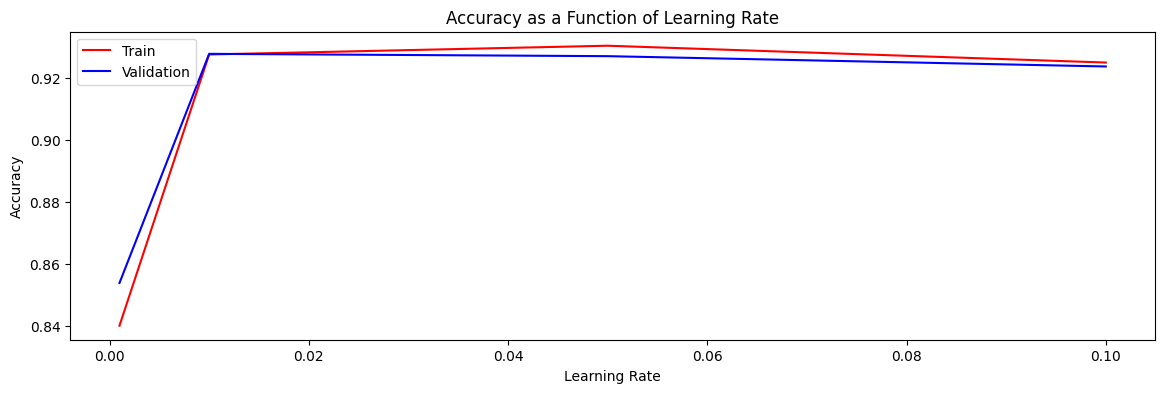

In [ ]:
# View the training and validation accuracies as functions of learning rate
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Learning Rate');

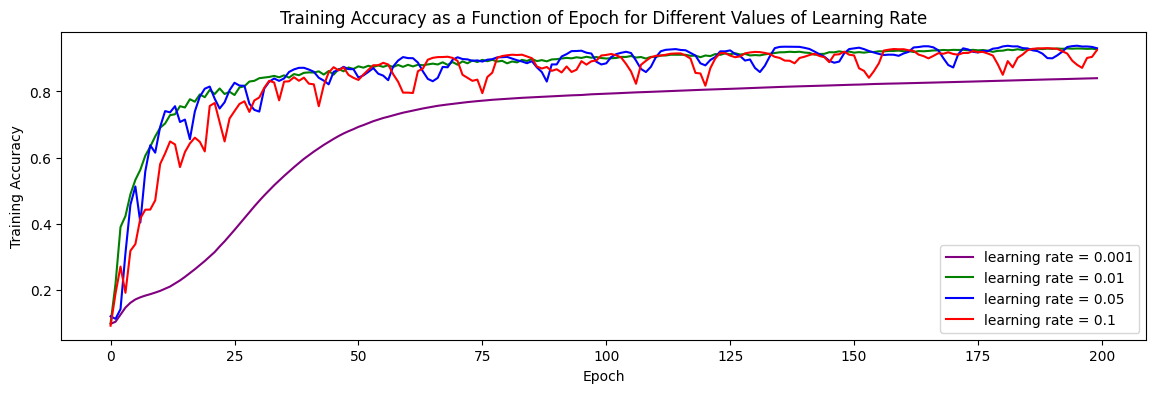

In [ ]:
# View the training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'learning rate = ' + str(current_learning_rate))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Learning Rate');

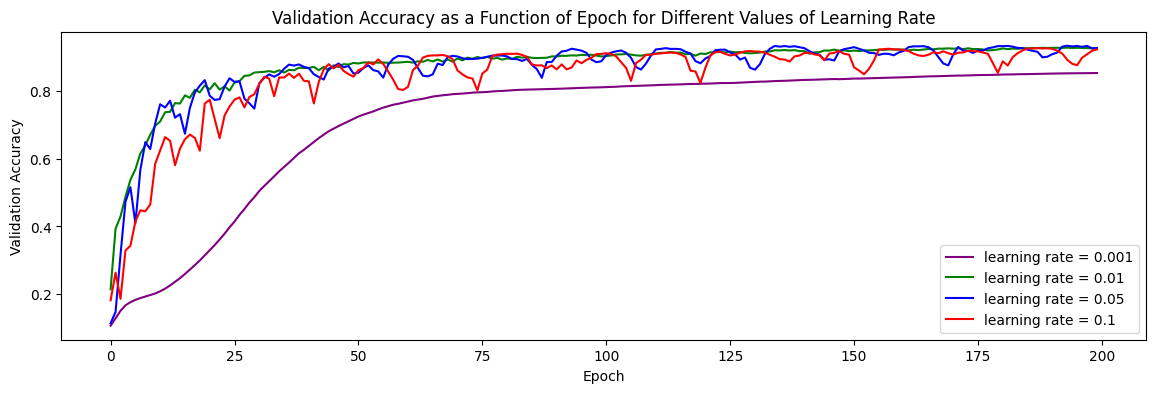

In [ ]:
# View the validation accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'learning rate = ' + str(current_learning_rate))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Learning Rate');

# Part 5 - Hyperparameter Tuning: Combinations of Hyperparameters
In this section, we will:
- Tune the basic neural network model on the combination of the batch size and learning rate hyperparameters using *GridSearchCV*
- Retrain the basic neural network model with potentially optimal values for the different hyperparameters
- View the performance of the model on the training, validation and testing data sets

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
base_grid_model = KerasClassifier(build_fn = create_nn)

# Define the range of the batch size and learning rate parameters and store it in a parameter grid dictionary
# Note: 'KerasClassifier()' recognizes the 'batch_size' parameter even though it is not defined explicitly in 'create_nn()'
parameters_grid = {'batch_size': [32, 1024], 'optimizer__learning_rate': [0.01, 0.1]} # Changed learning_rate_value to optimizer__learning_rate

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

# Note: The 'epochs' parameter is set to 10 due the batch sizes considered
grid_model = grid.fit(X_train, y_train, epochs = 10)

# Print the optimal values of 'batch_size' and 'learning_rate_value'
best_batch_size = grid_model.best_params_['batch_size']
best_learning_rate = grid_model.best_params_['optimizer__learning_rate'] # Changed learning_rate_value to optimizer__learning_rate
best_accuracy = grid_model.best_score_

print('The optimal value of batch size is', best_batch_size)
print('The optimal value of learning rate is', best_learning_rate)
print('The accuracy of the model with these optimal parameters is ', best_accuracy)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7030 - loss: 1.4116
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - loss: 0.4741
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3361
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9197 - loss: 0.2931
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9266 - loss: 0.2576
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9318 - loss: 0.2438
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9334 - loss: 0.2334
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9392 - loss: 0.2152
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9403 - loss: 0.2062
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9407 - loss: 0.2109
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV 1/2] END batch_size=32, optimizer__

We will now retrain the basic neural network model with a combination of potentially optimal values for hyperparameters and check its performance on the training, validation and testing data sets.

Note: We have tuned our neural network for a combination of two hyperparameters for the purpose of this demonstration. Ideally, we could tune the model for a combination of as many hyperparameter values as we require.

In [ ]:
# Create a neural network model with a combination of potentially optimal hyperparameter values and train the model
nn = create_nn(n_hidden = 1,
               n_neurons = 16,
               activation_function = 'relu',
               loss_function = 'categorical_crossentropy',
               learning_rate_value = best_learning_rate)

nn.summary()
print('\n')
nn_history = nn.fit(X_train, y_train, batch_size = best_batch_size, validation_split = 0.2, epochs = 10)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8406 - loss: 0.5325 - val_accuracy: 0.9285 - val_loss: 0.2635
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9189 - loss: 0.3020 - val_accuracy: 0.9231 - val_loss: 0.2839
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9232 - loss: 0.2853 - val_accuracy: 0.9241 - val_loss: 0.2975
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9318 - loss: 0.2640 - val_accuracy: 0.9250 - val_loss: 0.2980
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9319 - loss: 0.2609 - val_accuracy: 0.9310 - val_loss: 0.2639
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.2519 - val_accuracy: 0.9345 - val_loss: 0.2703
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9350 - loss: 0.2571 - val_accuracy: 0.9351 - val_loss: 0.2774
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9370 - loss: 0.2482 

In [ ]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
1,0.888188,0.391486,0.928500,0.263520
2,0.919937,0.299557,0.923083,0.283887
3,0.924917,0.282019,0.924083,0.297541
4,0.928083,0.278762,0.925000,0.297976
5,0.930000,0.268180,0.931000,0.263889
6,0.932792,0.264984,0.934500,0.270260
7,0.934458,0.263633,0.935083,0.277417
8,0.934083,0.257824,0.932083,0.279267
9,0.934333,0.260050,0.925750,0.296108


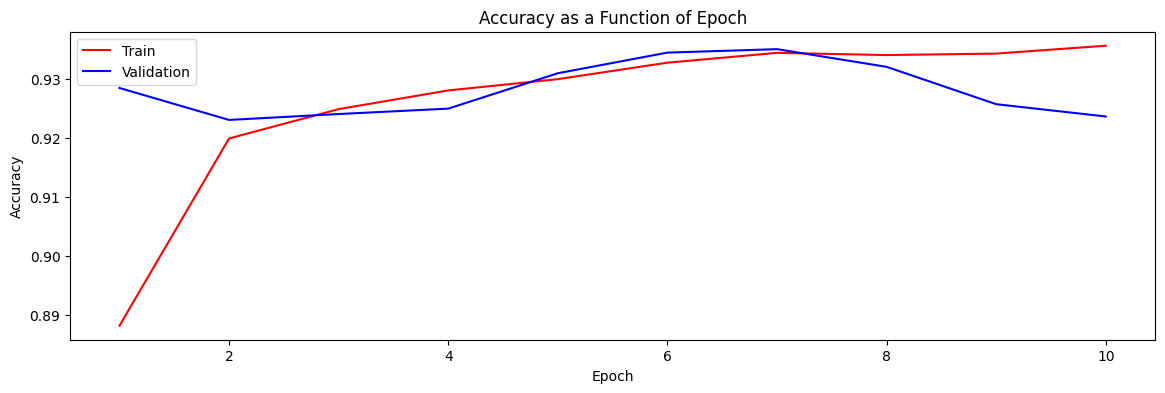

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9137 - loss: 0.3865
The loss value of the model on the test data is 0.3507789373397827
The accuracy of the model on the test data is 0.9251999855041504


# Part 6 - Early stopping
In this section, we will:
- Avoid overfitting while training our model by using the early stopping technique to arrive at an optimal number of epochs
  - We will use the *callbacks* function from *keras* to execute this
  - We will also see how the *patience* parameter can be used to set a tolerance level for this method
- View the performance of the model on the training, validation and testing data sets

In [ ]:
# Create a neural network model with potentially optimal values of hyperparameters and train the model for 25 epochs
nn = create_nn(n_hidden = 1,
               n_neurons = 16,
               activation_function = 'relu',
               loss_function = 'categorical_crossentropy',
               learning_rate_value = 0.01)

nn.summary()
print('\n')
nn_history = nn.fit(X_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 25)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8523 - loss: 0.4822 - val_accuracy: 0.9212 - val_loss: 0.2777
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9291 - loss: 0.2638 - val_accuracy: 0.9288 - val_loss: 0.2828
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9343 - loss: 0.2519 - val_accuracy: 0.9359 - val_loss: 0.2589
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9395 - loss: 0.2359 - val_accuracy: 0.9419 - val_loss: 0.2518
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9453 - loss: 0.2234 - val_accuracy: 0.9396 - val_loss: 0.2673
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9444 - loss: 0.2215 - val_accuracy: 0.9448 - val_loss: 0.2533
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9463 - loss: 0.2162 - val_accuracy: 0.9417 - val_loss: 0.2592
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9477 - loss: 0.2154 

In [ ]:
# Convert the neural network history object into a data frame
hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch

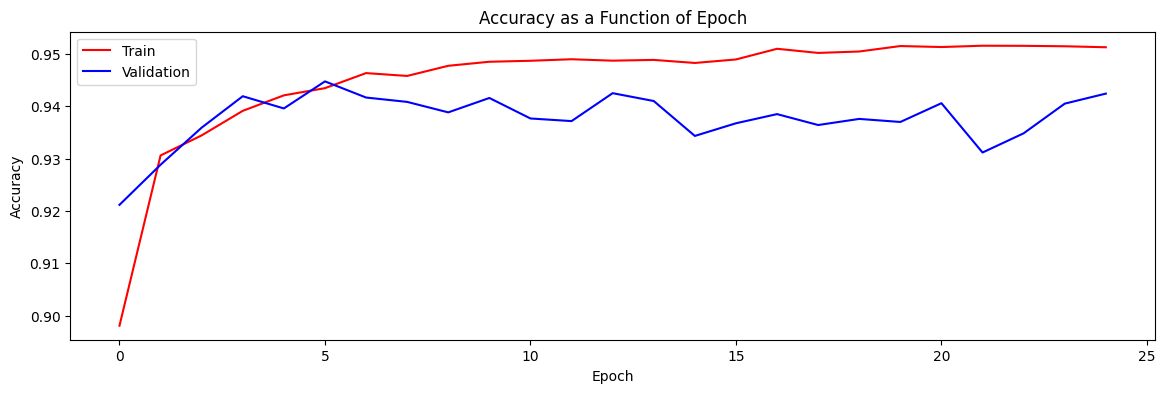

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9353 - loss: 0.3621
The loss value of the model on the test data is 0.3388145864009857
The accuracy of the model on the test data is 0.9409999847412109


We will now use the early stopping method to try to prevent overfitting in the model. For this, we will use the *EarlyStopping()* method from *keras.callbacks*.

In [ ]:
# Use basic early stopping to prevent overfitting
nn = create_nn(n_hidden = 1,
               n_neurons = 16,
               activation_function = 'relu',
               loss_function = 'categorical_crossentropy',
               learning_rate_value = 0.01)

nn.summary()
print('\n')
nn_history = nn.fit(X_train,
                    y_train,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 25,
                    callbacks = [EarlyStopping(monitor = 'val_loss',
                                               mode = 'min',
                                               verbose = 1)])

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8381 - loss: 0.5278 - val_accuracy: 0.9226 - val_loss: 0.2805
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9153 - loss: 0.3005 - val_accuracy: 0.9199 - val_loss: 0.2868
Epoch 2: early stopping


In [ ]:
# Convert the neural network history object into a data frame
hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch

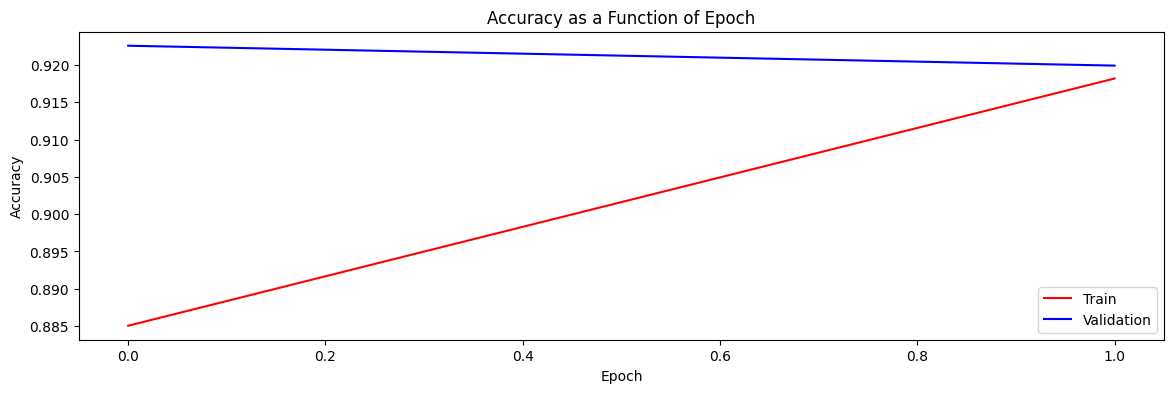

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9105 - loss: 0.3377
The loss value of the model on the test data is 0.2978455424308777
The accuracy of the model on the test data is 0.9190000295639038


We can use the *patience* parameter of the *EarlyStopping()* method to set a tolerance limit for the early stopping process.

In [ ]:
# Use advanced early stopping with patience to prevent overfitting
nn = create_nn(n_hidden = 1,
               n_neurons = 16,
               activation_function = 'relu',
               loss_function = 'categorical_crossentropy',
               learning_rate_value = 0.01)

nn.summary()
print('\n')
nn_history = nn.fit(X_train,
                    y_train,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 25,
                    callbacks = [EarlyStopping(monitor = 'val_loss',
                                               mode = 'min',
                                               patience = 2,
                                               verbose = 1)])

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8455 - loss: 0.5025 - val_accuracy: 0.9250 - val_loss: 0.2586
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.2695 - val_accuracy: 0.9305 - val_loss: 0.2656
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9329 - loss: 0.2531 - val_accuracy: 0.9284 - val_loss: 0.2722
Epoch 3: early stopping


In [ ]:
# Convert the neural network history object into a data frame
hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch

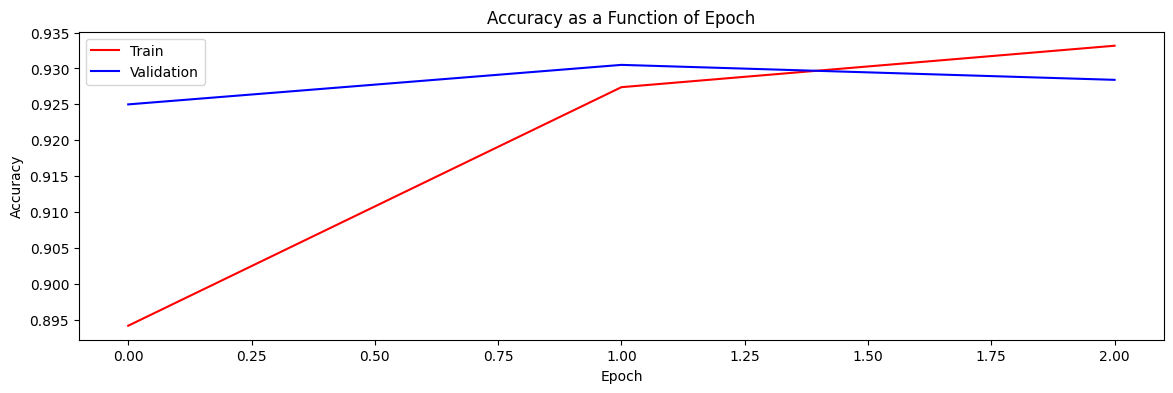

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9176 - loss: 0.3065
The loss value of the model on the test data is 0.2641086280345917
The accuracy of the model on the test data is 0.9297999739646912


# Part 7 - Dropouts
In this section, we will:
- Avoid overfitting in our model by using dropout layers in our neural network model

In [ ]:
# Define a function to create a neural network model with dropout layers
def create_dropout_nn(dropout_rate = 0):

    nn = Sequential()

    nn.add(Dense(units = 256,
                 input_shape = (image_vector_size, ),
                 activation = 'relu'))

    nn.add(Dropout(rate = dropout_rate))

    nn.add(Dense(units = 16,
                 activation = 'relu'))

    nn.add(Dropout(rate = dropout_rate))

    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))

    nn.compile(loss = 'categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = 0.01))

    return(nn)

In [ ]:
# Declare a range of dropout rates to tune for
dropout_rate_list = [0, 0.05, 0.5]

# Create and train a neural network model for each value of dropout rate
performance_df = pd.DataFrame(data = None)
indexcount = -1

for current_dropout_rate in dropout_rate_list:
    indexcount = indexcount + 1

    nn = create_dropout_nn(dropout_rate = current_dropout_rate)

    print('\n Training and validation for dropout rate {} - START \n'.format(current_dropout_rate))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 10)
    print('\n Training and validation for dropout rate {} - END \n'.format(current_dropout_rate))

    hist = pd.DataFrame(nn_history.history)

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Dropout Rate': current_dropout_rate,
                                  'Train Accuracy': hist['accuracy'][9],
                                  'Validation Accuracy': hist['val_accuracy'][9]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for dropout rate 0 - START 



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,242 (801.73 KB)

 Trainable params: 205,242 (801.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7794 - loss: 0.7472 - val_accuracy: 0.9477 - val_loss: 0.2339
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9487 - loss: 0.2221 - val_accuracy: 0.9457 - val_loss: 0.2649
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9547 - loss: 0.2238 - val_accuracy: 0.9407 - val_loss: 0.2528
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9565 - loss: 0.2209 - val_accuracy: 0.9347 - val_loss: 0.2803
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9535 - loss: 0.2237 - val_accuracy: 0.9453 - val_loss: 0.4534
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9560 - loss: 0.2609 - val_accuracy: 0.9392 - val_loss: 0.4785
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9568 - loss: 0.2358 - val_accuracy: 0.9536 - val_loss: 0.3875
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9578 - loss: 0.246

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,242 (801.73 KB)

 Trainable params: 205,242 (801.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8019 - loss: 0.6551 - val_accuracy: 0.9515 - val_loss: 0.2218
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9318 - loss: 0.2950 - val_accuracy: 0.9463 - val_loss: 0.3544
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9373 - loss: 0.3220 - val_accuracy: 0.9557 - val_loss: 0.2752
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9434 - loss: 0.2997 - val_accuracy: 0.9513 - val_loss: 0.3030
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9435 - loss: 0.3090 - val_accuracy: 0.9515 - val_loss: 0.2981
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9426 - loss: 0.3445 - val_accuracy: 0.9571 - val_loss: 0.3250
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9458 - loss: 0.3297 - val_accuracy: 0.9463 - val_loss: 0.4820
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9495 - loss: 0.296

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,242 (801.73 KB)

 Trainable params: 205,242 (801.73 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2706 - loss: 1.9708 - val_accuracy: 0.8000 - val_loss: 0.6392
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6580 - loss: 1.1525 - val_accuracy: 0.8951 - val_loss: 0.4273
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7162 - loss: 1.0757 - val_accuracy: 0.9158 - val_loss: 0.4770
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7246 - loss: 1.0860 - val_accuracy: 0.9240 - val_loss: 0.4268
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7249 - loss: 1.1121 - val_accuracy: 0.9308 - val_loss: 0.4700
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7278 - loss: 1.1063 - val_accuracy: 0.9187 - val_loss: 0.4672
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7265 - loss: 1.2011 - val_accuracy: 0.9102 - val_loss: 0.5207
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7134 - loss: 1.185

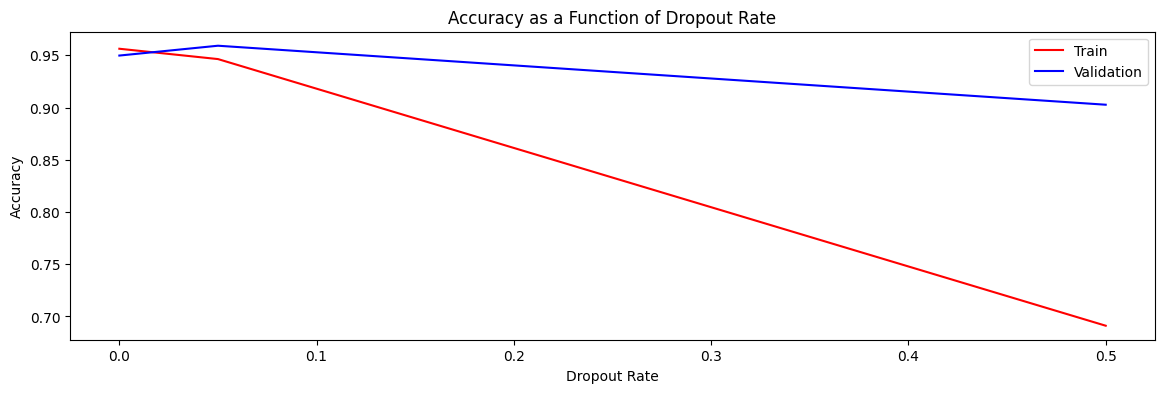

In [ ]:
# View the training and validation accuracies as functions of dropout rate
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Dropout Rate', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Dropout Rate', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Dropout Rate');